In [1]:
import datetime
import pandas as pd
import numpy as np

In [2]:
HongKong = pd.read_csv("HSI.csv")
China = pd.read_csv("HS300.csv")
US = pd.read_csv("SP500TR.csv")
Japan = pd.read_csv("Japan.csv")

In [3]:
Japan['Open'] = Japan['Open'].apply(lambda x: eval(x) if x != 'null' else np.nan)
HongKong['Open'] = HongKong['Open'].apply(lambda x: eval(x) if x != 'null' else np.nan )
Japan['Close'] = Japan['Close'].apply(lambda x: eval(x) if x != 'null' else np.nan)
HongKong['Close'] = HongKong['Close'].apply(lambda x: eval(x) if x != 'null' else np.nan)
Japan['High'] = Japan['High'].apply(lambda x: eval(x) if x != 'null' else np.nan)
HongKong['High'] = HongKong['High'].apply(lambda x: eval(x) if x != 'null' else np.nan)
Japan['Low'] = Japan['Low'].apply(lambda x: eval(x) if x != 'null' else np.nan)
HongKong['Low'] = HongKong['Low'].apply(lambda x: eval(x) if x != 'null' else np.nan)

In [4]:
def datefilter(date):
    a,b,c = date.split('-')
    return datetime.datetime(int(a),int(b),int(c))

In [5]:
HongKong['Date'] = HongKong['Date'].apply(lambda x:datefilter(x) )
China['date'] = China['date'].apply(lambda x:datefilter(x) )
US['Date'] = US['Date'].apply(lambda x:datefilter(x) )
Japan['Date'] = Japan['Date'].apply(lambda x:datefilter(x) )

In [6]:
start = datetime.datetime(2016,1,4)
end = datetime.datetime(2018,5,3)

In [7]:
HK = HongKong[(HongKong['Date'] >= start) & (HongKong['Date'] <= end)]
CN = China[(China['date'] >= start) & (China['date'] <= end)]
USA = US[(US['Date'] >= start) & (US['Date'] <= end)]
JP = Japan[(Japan['Date'] >= start) & (Japan['Date'] <= end)]

In [8]:
CN.columns = ['Unnamed: 0', 'Date', 'Open', 'Close', 'High', 'Low', 'Volume', 'Code']

In [9]:
Open = pd.DataFrame()
Open['Date'] = USA.Date
Open['USA'] = USA.Open

In [10]:
Open = Open.merge(HK[['Date','Open']], on=['Date'], how = 'inner')
Open.columns  = ['Date','USA','HK']

In [11]:
Open = Open.merge(CN[['Date','Open']], on=['Date'], how = 'inner')
Open.columns  = ['Date','USA','HK','CN']

In [12]:
Open = Open.merge(JP[['Date','Open']], on=['Date'], how = 'inner')
Open.columns  = ['Date','USA','HK','CN','JP']

In [13]:
Open.dropna(inplace = True)

In [14]:
Open['USA'] = Open['USA']/Open['USA'][0]
Open['HK'] = Open['HK']/Open['HK'][0]
Open['CN'] = Open['CN']/Open['CN'][0]
Open['JP'] = Open['JP']/Open['JP'][0]


In [15]:
Open.plot()

In [16]:
from statsmodels.tsa.stattools import grangercausalitytests as granger
granger(Open[['USA','CN']], maxlag = 4)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.8624  , p=0.3535  , df_denom=506, df_num=1
ssr based chi2 test:   chi2=0.8675  , p=0.3517  , df=1
likelihood ratio test: chi2=0.8667  , p=0.3519  , df=1
parameter F test:         F=0.8624  , p=0.3535  , df_denom=506, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.1749  , p=0.8396  , df_denom=503, df_num=2
ssr based chi2 test:   chi2=0.3533  , p=0.8381  , df=2
likelihood ratio test: chi2=0.3531  , p=0.8381  , df=2
parameter F test:         F=0.1749  , p=0.8396  , df_denom=503, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.1591  , p=0.0920  , df_denom=500, df_num=3
ssr based chi2 test:   chi2=6.5679  , p=0.0870  , df=3
likelihood ratio test: chi2=6.5257  , p=0.0887  , df=3
parameter F test:         F=2.1591  , p=0.0920  , df_denom=500, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.0388  , p=0.3866  

/Users/nicholasguam/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


{1: ({'lrtest': (0.8667357834738141, 0.3518605696295496, 1),
   'params_ftest': (0.8623613361276141, 0.35352149805654043, 506.0, 1),
   'ssr_chi2test': (0.8674741503739037, 0.3516555209318605, 1),
   'ssr_ftest': (0.8623613361280851, 0.35352149805641464, 506.0, 1)},
   array([[0., 1., 0.]])]),
 2: ({'lrtest': (0.3531330504556536, 0.8381430196451646, 2),
   'params_ftest': (0.17488944534202433, 0.8396008608489282, 503.0, 2),
   'ssr_chi2test': (0.3532558180266937, 0.8380915728328278, 2),
   'ssr_ftest': (0.17488944534195566, 0.8396008608489751, 503.0, 2)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'lrtest': (6.525688583863484, 0.08865489645338154, 3),
   'params_ftest': (2.1590618032948137, 0.09197760871054653, 500.0, 3),
   'ssr_chi2test': (6.567866005617864, 0.08702411917149393, 3),
   'ssr_ftest': (2.1590618032931834, 0.09197760871074263, 500.0, 3)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 

In [17]:
granger(Open[['CN','USA']],maxlag = 4)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=22.0328 , p=0.0000  , df_denom=506, df_num=1
ssr based chi2 test:   chi2=22.1634 , p=0.0000  , df=1
likelihood ratio test: chi2=21.6945 , p=0.0000  , df=1
parameter F test:         F=22.0328 , p=0.0000  , df_denom=506, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=4.2580  , p=0.0147  , df_denom=503, df_num=2
ssr based chi2 test:   chi2=8.6007  , p=0.0136  , df=2
likelihood ratio test: chi2=8.5287  , p=0.0141  , df=2
parameter F test:         F=4.2580  , p=0.0147  , df_denom=503, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=5.0625  , p=0.0018  , df_denom=500, df_num=3
ssr based chi2 test:   chi2=15.4001 , p=0.0015  , df=3
likelihood ratio test: chi2=15.1709 , p=0.0017  , df=3
parameter F test:         F=5.0625  , p=0.0018  , df_denom=500, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=4.6716  , p=0.0010  

{1: ({'lrtest': (21.694455653980185, 3.1971399192323804e-06, 1),
   'params_ftest': (22.032792945659626, 3.455566720177929e-06, 506.0, 1),
   'ssr_chi2test': (22.163422152846096, 2.503992115172381e-06, 1),
   'ssr_ftest': (22.032792945658397, 3.455566720180047e-06, 506.0, 1)},
   array([[0., 1., 0.]])]),
 2: ({'lrtest': (8.528718477472466, 0.014060873910477372, 2),
   'params_ftest': (4.258030831731199, 0.014663597764114982, 503.0, 2),
   'ssr_chi2test': (8.600714363899966, 0.013563713433262674, 2),
   'ssr_ftest': (4.25803083173394, 0.014663597764075324, 503.0, 2)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'lrtest': (15.170862448357184, 0.0016763062880875966, 3),
   'params_ftest': (5.06249862046608, 0.0018370021742946847, 500.0, 3),
   'ssr_chi2test': (15.40012080345979, 0.001504761220919378, 3),
   'ssr_ftest': (5.062498620466729, 0.001837002174293084, 500.0, 3)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
       

In [18]:
granger(Open[['JP','USA']],maxlag = 4)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=11.8045 , p=0.0006  , df_denom=506, df_num=1
ssr based chi2 test:   chi2=11.8745 , p=0.0006  , df=1
likelihood ratio test: chi2=11.7381 , p=0.0006  , df=1
parameter F test:         F=11.8045 , p=0.0006  , df_denom=506, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=14.4577 , p=0.0000  , df_denom=503, df_num=2
ssr based chi2 test:   chi2=29.2028 , p=0.0000  , df=2
likelihood ratio test: chi2=28.3942 , p=0.0000  , df=2
parameter F test:         F=14.4577 , p=0.0000  , df_denom=503, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=10.5704 , p=0.0000  , df_denom=500, df_num=3
ssr based chi2 test:   chi2=32.1552 , p=0.0000  , df=3
likelihood ratio test: chi2=31.1766 , p=0.0000  , df=3
parameter F test:         F=10.5704 , p=0.0000  , df_denom=500, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=7.6176  , p=0.0000  

{1: ({'lrtest': (11.738062333181915, 0.0006123474353864927, 1),
   'params_ftest': (11.804467683049927, 0.0006394845597344317, 506.0, 1),
   'ssr_chi2test': (11.874454645598712, 0.0005690913136607896, 1),
   'ssr_ftest': (11.80446768305098, 0.0006394845597340614, 506.0, 1)},
   array([[0., 1., 0.]])]),
 2: ({'lrtest': (28.394247674775215, 6.827590391270413e-07, 2),
   'params_ftest': (14.457674546807361, 7.851521105401845e-07, 503.0, 2),
   'ssr_chi2test': (29.20277801104803, 4.5571920048210714e-07, 2),
   'ssr_ftest': (14.457674546808228, 7.851521105395596e-07, 503.0, 2)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'lrtest': (31.176646213152708, 7.802728187545992e-07, 3),
   'params_ftest': (10.570402209474748, 9.472016145947276e-07, 500.0, 3),
   'ssr_chi2test': (32.155163521215805, 4.853850768478429e-07, 3),
   'ssr_ftest': (10.570402209472652, 9.472016145974753e-07, 500.0, 3)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0.,

In [19]:
granger(Open[['USA','JP']],maxlag = 4)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3923  , p=0.5314  , df_denom=506, df_num=1
ssr based chi2 test:   chi2=0.3946  , p=0.5299  , df=1
likelihood ratio test: chi2=0.3945  , p=0.5300  , df=1
parameter F test:         F=0.3923  , p=0.5314  , df_denom=506, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.2427  , p=0.2895  , df_denom=503, df_num=2
ssr based chi2 test:   chi2=2.5102  , p=0.2850  , df=2
likelihood ratio test: chi2=2.5040  , p=0.2859  , df=2
parameter F test:         F=1.2427  , p=0.2895  , df_denom=503, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.7393  , p=0.5290  , df_denom=500, df_num=3
ssr based chi2 test:   chi2=2.2488  , p=0.5224  , df=3
likelihood ratio test: chi2=2.2439  , p=0.5234  , df=3
parameter F test:         F=0.7393  , p=0.5290  , df_denom=500, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.8758  , p=0.4782  

{1: ({'lrtest': (0.3944547464034258, 0.5299670432274015, 1),
   'params_ftest': (0.39228184755573225, 0.5313848354472872, 506.0, 1),
   'ssr_chi2test': (0.3946076292600216, 0.5298873251477307, 1),
   'ssr_ftest': (0.39228184755514917, 0.531384835447611, 506.0, 1)},
   array([[0., 1., 0.]])]),
 2: ({'lrtest': (2.5040030595146163, 0.28593192248746535, 2),
   'params_ftest': (1.242738981016714, 0.28947721780064034, 503.0, 2),
   'ssr_chi2test': (2.5101845024114935, 0.2850495508467266, 2),
   'ssr_ftest': (1.2427389810167138, 0.28947721780064034, 503.0, 2)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'lrtest': (2.2438554812333678, 0.5233619430569822, 3),
   'params_ftest': (0.7392597589479726, 0.5289831245750751, 500.0, 3),
   'ssr_chi2test': (2.2488281867203472, 0.5223948822434665, 3),
   'ssr_ftest': (0.7392597589481746, 0.5289831245749658, 500.0, 3)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0.,

In [20]:
granger(Open[['USA','HK']],maxlag = 2)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.6375  , p=0.4250  , df_denom=506, df_num=1
ssr based chi2 test:   chi2=0.6413  , p=0.4232  , df=1
likelihood ratio test: chi2=0.6409  , p=0.4234  , df=1
parameter F test:         F=0.6375  , p=0.4250  , df_denom=506, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.5968  , p=0.0755  , df_denom=503, df_num=2
ssr based chi2 test:   chi2=5.2452  , p=0.0726  , df=2
likelihood ratio test: chi2=5.2183  , p=0.0736  , df=2
parameter F test:         F=2.5968  , p=0.0755  , df_denom=503, df_num=2


{1: ({'lrtest': (0.6408803794893174, 0.4233921787223621, 1),
   'params_ftest': (0.6375043441360231, 0.4249905344755597, 506.0, 1),
   'ssr_chi2test': (0.6412840141617077, 0.4232462191941272, 1),
   'ssr_ftest': (0.637504344137179, 0.42499053447513047, 506.0, 1)},
   array([[0., 1., 0.]])]),
 2: ({'lrtest': (5.218336583127893, 0.07359572850385168, 2),
   'params_ftest': (2.5968022534920028, 0.07551020235750448, 503.0, 2),
   'ssr_chi2test': (5.245230794327768, 0.0726127032063367, 2),
   'ssr_ftest': (2.5968022534910116, 0.07551020235757863, 503.0, 2)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])])}

In [21]:
granger(Open[['HK','USA']],maxlag = 2)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=13.7772 , p=0.0002  , df_denom=506, df_num=1
ssr based chi2 test:   chi2=13.8588 , p=0.0002  , df=1
likelihood ratio test: chi2=13.6735 , p=0.0002  , df=1
parameter F test:         F=13.7772 , p=0.0002  , df_denom=506, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=6.6093  , p=0.0015  , df_denom=503, df_num=2
ssr based chi2 test:   chi2=13.3501 , p=0.0013  , df=2
likelihood ratio test: chi2=13.1777 , p=0.0014  , df=2
parameter F test:         F=6.6093  , p=0.0015  , df_denom=503, df_num=2


{1: ({'lrtest': (13.673533690447584, 0.00021749826489753058, 1),
   'params_ftest': (13.777166222865231, 0.00022866328199016135, 506.0, 1),
   'ssr_chi2test': (13.858849026557046, 0.00019706656835236777, 1),
   'ssr_ftest': (13.777166222864176, 0.00022866328199029905, 506.0, 1)},
   array([[0., 1., 0.]])]),
 2: ({'lrtest': (13.177688255187604, 0.0013756290967408074, 2),
   'params_ftest': (6.60934700941437, 0.001467796034430685, 503.0, 2),
   'ssr_chi2test': (13.350092567723701, 0.0012620141736031884, 2),
   'ssr_ftest': (6.609347009414391, 0.001467796034430685, 503.0, 2)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])])}

In [22]:
granger(Open[['HK','CN']],maxlag = 6)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.0270  , p=0.1551  , df_denom=506, df_num=1
ssr based chi2 test:   chi2=2.0390  , p=0.1533  , df=1
likelihood ratio test: chi2=2.0349  , p=0.1537  , df=1
parameter F test:         F=2.0270  , p=0.1551  , df_denom=506, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.7394  , p=0.4779  , df_denom=503, df_num=2
ssr based chi2 test:   chi2=1.4935  , p=0.4739  , df=2
likelihood ratio test: chi2=1.4913  , p=0.4744  , df=2
parameter F test:         F=0.7394  , p=0.4779  , df_denom=503, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.7585  , p=0.5178  , df_denom=500, df_num=3
ssr based chi2 test:   chi2=2.3074  , p=0.5111  , df=3
likelihood ratio test: chi2=2.3021  , p=0.5121  , df=3
parameter F test:         F=0.7585  , p=0.5178  , df_denom=500, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.3713  , p=0.8291  

{1: ({'lrtest': (2.034930199667542, 0.15372124113752378, 1),
   'params_ftest': (2.0269856463324065, 0.15514315563980677, 506.0, 1),
   'ssr_chi2test': (2.0390033477913714, 0.1533100660577027, 1),
   'ssr_ftest': (2.0269856463309117, 0.15514315563995318, 506.0, 1)},
   array([[0., 1., 0.]])]),
 2: ({'lrtest': (1.491347938916988, 0.47441445131706217, 2),
   'params_ftest': (0.7394194935626376, 0.47790913498482135, 503.0, 2),
   'ssr_chi2test': (1.4935391758649168, 0.47389495871469545, 2),
   'ssr_ftest': (0.7394194935630445, 0.4779091349846346, 503.0, 2)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'lrtest': (2.302118785717539, 0.5121151254080321, 3),
   'params_ftest': (0.7584987785095949, 0.5177900056772365, 500.0, 3),
   'ssr_chi2test': (2.3073532842256097, 0.5111136768070275, 3),
   'ssr_ftest': (0.7584987785094047, 0.5177900056773441, 500.0, 3)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0.,

In [23]:
granger(Open[['CN','HK']],maxlag = 6)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=13.8991 , p=0.0002  , df_denom=506, df_num=1
ssr based chi2 test:   chi2=13.9815 , p=0.0002  , df=1
likelihood ratio test: chi2=13.7929 , p=0.0002  , df=1
parameter F test:         F=13.8991 , p=0.0002  , df_denom=506, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=4.0468  , p=0.0180  , df_denom=503, df_num=2
ssr based chi2 test:   chi2=8.1741  , p=0.0168  , df=2
likelihood ratio test: chi2=8.1090  , p=0.0173  , df=2
parameter F test:         F=4.0468  , p=0.0180  , df_denom=503, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=3.0494  , p=0.0283  , df_denom=500, df_num=3
ssr based chi2 test:   chi2=9.2763  , p=0.0258  , df=3
likelihood ratio test: chi2=9.1924  , p=0.0268  , df=3
parameter F test:         F=3.0494  , p=0.0283  , df_denom=500, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=3.6568  , p=0.0060  

{1: ({'lrtest': (13.792919821880787, 0.00020410395806503756, 1),
   'params_ftest': (13.899094441074995, 0.00021466997616902275, 506.0, 1),
   'ssr_chi2test': (13.981500139338904, 0.00018461825257805455, 1),
   'ssr_ftest': (13.89909444107168, 0.00021466997616938503, 506.0, 1)},
   array([[0., 1., 0.]])]),
 2: ({'lrtest': (8.109044025935873, 0.01734376829883648, 2),
   'params_ftest': (4.046828494922583, 0.018049897006271937, 503.0, 2),
   'ssr_chi2test': (8.17411083666046, 0.016788596239439003, 2),
   'ssr_ftest': (4.046828494921468, 0.018049897006291803, 503.0, 2)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'lrtest': (9.192439570401802, 0.026838750549383665, 3),
   'params_ftest': (3.0494016347471757, 0.02831573718010448, 500.0, 3),
   'ssr_chi2test': (9.276279772908948, 0.02583442481344469, 3),
   'ssr_ftest': (3.0494016347498185, 0.02831573718000397, 500.0, 3)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
         

In [24]:
granger(Open[['JP','HK']],maxlag = 2)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.2571  , p=0.0396  , df_denom=506, df_num=1
ssr based chi2 test:   chi2=4.2823  , p=0.0385  , df=1
likelihood ratio test: chi2=4.2644  , p=0.0389  , df=1
parameter F test:         F=4.2571  , p=0.0396  , df_denom=506, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=6.0104  , p=0.0026  , df_denom=503, df_num=2
ssr based chi2 test:   chi2=12.1402 , p=0.0023  , df=2
likelihood ratio test: chi2=11.9974 , p=0.0025  , df=2
parameter F test:         F=6.0104  , p=0.0026  , df_denom=503, df_num=2


{1: ({'lrtest': (4.264424738808884, 0.0389184245578869, 1),
   'params_ftest': (4.257098785661263, 0.03959613747290559, 506.0, 1),
   'ssr_chi2test': (4.28233850178114, 0.03851033038677928, 1),
   'ssr_ftest': (4.257098785660623, 0.03959613747292038, 506.0, 1)},
   array([[0., 1., 0.]])]),
 2: ({'lrtest': (11.997433539340818, 0.0024819350283681535, 2),
   'params_ftest': (6.01036834122586, 0.0026328870906584005, 503.0, 2),
   'ssr_chi2test': (12.14022710673, 0.00231091078400696, 2),
   'ssr_ftest': (6.010368341225581, 0.0026328870906590952, 503.0, 2)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])])}

In [25]:
granger(Open[['HK','JP']],maxlag = 2)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1587  , p=0.6906  , df_denom=506, df_num=1
ssr based chi2 test:   chi2=0.1596  , p=0.6895  , df=1
likelihood ratio test: chi2=0.1596  , p=0.6895  , df=1
parameter F test:         F=0.1587  , p=0.6906  , df_denom=506, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.8541  , p=0.1577  , df_denom=503, df_num=2
ssr based chi2 test:   chi2=3.7451  , p=0.1537  , df=2
likelihood ratio test: chi2=3.7314  , p=0.1548  , df=2
parameter F test:         F=1.8541  , p=0.1577  , df_denom=503, df_num=2


{1: ({'lrtest': (0.15957693884956825, 0.6895463178021137, 1),
   'params_ftest': (0.15866127649656275, 0.690560063561223, 506.0, 1),
   'ssr_chi2test': (0.15960195600145277, 0.689523250785004, 1),
   'ssr_ftest': (0.15866127649653264, 0.690560063561223, 506.0, 1)},
   array([[0., 1., 0.]])]),
 2: ({'lrtest': (3.7313968259677495, 0.1547880661296677, 2),
   'params_ftest': (1.8541364691671678, 0.15765672444625106, 503.0, 2),
   'ssr_chi2test': (3.745134498358677, 0.1537284954331423, 2),
   'ssr_ftest': (1.854136469167731, 0.15765672444616327, 503.0, 2)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])])}

In [26]:
granger(Open[['CN','JP']],maxlag = 2)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=8.9285  , p=0.0029  , df_denom=506, df_num=1
ssr based chi2 test:   chi2=8.9814  , p=0.0027  , df=1
likelihood ratio test: chi2=8.9031  , p=0.0028  , df=1
parameter F test:         F=8.9285  , p=0.0029  , df_denom=506, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.5802  , p=0.2069  , df_denom=503, df_num=2
ssr based chi2 test:   chi2=3.1919  , p=0.2027  , df=2
likelihood ratio test: chi2=3.1819  , p=0.2037  , df=2
parameter F test:         F=1.5802  , p=0.2069  , df_denom=503, df_num=2


{1: ({'lrtest': (8.903091764961573, 0.0028468822214914743, 1),
   'params_ftest': (8.928475609901632, 0.0029439425734208604, 506.0, 1),
   'ssr_chi2test': (8.981411236046627, 0.0027273992192263815, 1),
   'ssr_ftest': (8.92847560990097, 0.0029439425734219377, 506.0, 1)},
   array([[0., 1., 0.]])]),
 2: ({'lrtest': (3.181916172041383, 0.20373032702106492, 2),
   'params_ftest': (1.5802428994678355, 0.20694565638171358, 503.0, 2),
   'ssr_chi2test': (3.191902158767224, 0.20271563812589638, 2),
   'ssr_ftest': (1.580242899468419, 0.20694565638159154, 503.0, 2)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])])}

In [27]:
granger(Open[['JP','USA']],maxlag = 2)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=11.8045 , p=0.0006  , df_denom=506, df_num=1
ssr based chi2 test:   chi2=11.8745 , p=0.0006  , df=1
likelihood ratio test: chi2=11.7381 , p=0.0006  , df=1
parameter F test:         F=11.8045 , p=0.0006  , df_denom=506, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=14.4577 , p=0.0000  , df_denom=503, df_num=2
ssr based chi2 test:   chi2=29.2028 , p=0.0000  , df=2
likelihood ratio test: chi2=28.3942 , p=0.0000  , df=2
parameter F test:         F=14.4577 , p=0.0000  , df_denom=503, df_num=2


{1: ({'lrtest': (11.738062333181915, 0.0006123474353864927, 1),
   'params_ftest': (11.804467683049927, 0.0006394845597344317, 506.0, 1),
   'ssr_chi2test': (11.874454645598712, 0.0005690913136607896, 1),
   'ssr_ftest': (11.80446768305098, 0.0006394845597340614, 506.0, 1)},
   array([[0., 1., 0.]])]),
 2: ({'lrtest': (28.394247674775215, 6.827590391270413e-07, 2),
   'params_ftest': (14.457674546807361, 7.851521105401845e-07, 503.0, 2),
   'ssr_chi2test': (29.20277801104803, 4.5571920048210714e-07, 2),
   'ssr_ftest': (14.457674546808228, 7.851521105395596e-07, 503.0, 2)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])])}

In [28]:
from statsmodels.tsa.stattools import grangercausalitytests as granger
cn_us = granger(Open[['USA','CN']], maxlag = 4)

us_cn = granger(Open[['USA','CN']], maxlag = 4)



Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.8624  , p=0.3535  , df_denom=506, df_num=1
ssr based chi2 test:   chi2=0.8675  , p=0.3517  , df=1
likelihood ratio test: chi2=0.8667  , p=0.3519  , df=1
parameter F test:         F=0.8624  , p=0.3535  , df_denom=506, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.1749  , p=0.8396  , df_denom=503, df_num=2
ssr based chi2 test:   chi2=0.3533  , p=0.8381  , df=2
likelihood ratio test: chi2=0.3531  , p=0.8381  , df=2
parameter F test:         F=0.1749  , p=0.8396  , df_denom=503, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.1591  , p=0.0920  , df_denom=500, df_num=3
ssr based chi2 test:   chi2=6.5679  , p=0.0870  , df=3
likelihood ratio test: chi2=6.5257  , p=0.0887  , df=3
parameter F test:         F=2.1591  , p=0.0920  , df_denom=500, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.0388  , p=0.3866  

## Define the granger p index:
>* P value/0.05: significant if > 1, minor if <= 1

In [29]:
def get_index_order(dicts,lags= 20,maxlag=4):
    result = {}
    for item in dicts:
        temp = []
        for i in range(dicts[item][1]+lags,dicts[item][0].shape[0]):
            re = granger(dicts[item][0].iloc[dicts[item][1]-1:i], maxlag=maxlag,verbose=False)
            #print("sda",re[4][0]['params_ftest'][1])
            temp+= [get_pindex(re,dicts[item][1] )]
        result[item] = temp
    return result, dicts[item][1]+lags

def get_pindex(result,order):
    return 0.05 - result[order][0]['params_ftest'][1]
def solution(dicts,s,Opens):
    result,start = get_index_order(dicts)
    result = pd.DataFrame(result)
    result['Date'] = pd.DataFrame(Opens.Date[start::].values)
    result['BaseLine'] = pd.DataFrame([0] * result.shape[0])
    ax = result.iloc[s::].plot()
    ax.set_ylim(-0.2,0.1)
    print("Start:",result['Date'].iloc[s])
    print("End:",result['Date'].iloc[-1])
    return result


In [30]:
China = pd.read_csv("HS300.csv")
US = pd.read_csv("SP500TR.csv")
China['date'] = China['date'].apply(lambda x:datefilter(x) )
US['Date'] = US['Date'].apply(lambda x:datefilter(x) )

In [31]:
start = datetime.datetime(2000,1,1)
end = datetime.datetime(2018,5,8)
CN = China[(China['date'] >= start) & (China['date'] <= end)]
CN.columns = ['Unnamed: 0', 'Date', 'Open', 'Close', 'High', 'Low', 'Volume', 'Code']
USA = US[(US['Date'] >= start) & (US['Date'] <= end)]
Index_USCN = pd.DataFrame()
Index_USCN['Date'] = USA.Date
Index_USCN['USA'] = USA.Open
Index_USCN = Index_USCN.merge(CN[['Date','Open']], on=['Date'], how = 'inner')
Index_USCN.columns  = ['Date','USA','CN']
US_GDP = pd.read_csv("USGDP.csv")
CN_GDP = pd.read_csv("CHNGDPNQDSMEI.csv")
GDP_USCN = pd.DataFrame()
CN_GDP.columns = ['Date','GDP']
US_GDP.columns = ['Date','GDP']
GDP_USCN['Date'] = US_GDP.Date
GDP_USCN['USA'] = US_GDP.GDP
GDP_USCN = GDP_USCN.merge(CN_GDP[['Date','GDP']], on=['Date'], how = 'inner')
GDP_USCN.columns  = ['Date','USA','CN']
GDP_USCN[['USA','CN']] = GDP_USCN[['USA','CN']]/GDP_USCN[['USA','CN']].iloc[0]
Index_USCN[['USA','CN']]  = Index_USCN[['USA','CN']]/Index_USCN[['USA','CN']].iloc[0]

Start: 2001-08-20 00:00:00
End: 2018-04-27 00:00:00


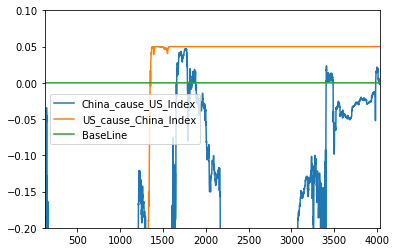

In [32]:
dicts = {"China_cause_US_Index":[Index_USCN[['USA','CN']],4],"US_cause_China_Index":[Index_USCN[['CN','USA']],4]}
result_Index = solution(dicts,120,Index_USCN)


Start: 2006-01-01
End: 2018-01-01


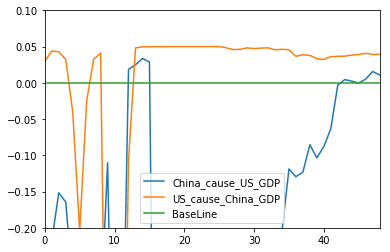

In [33]:
dicts = {"China_cause_US_GDP":[GDP_USCN[['USA','CN']],4],"US_cause_China_GDP":[GDP_USCN[['CN','USA']],4]}
result_GDP = solution(dicts,0,GDP_USCN)

In [34]:
GDP_ = result_GDP[['US_cause_China_GDP','Date']]
GDP_.Date = GDP_.Date.apply(lambda x:datefilter(x) )
Index_ = result_Index[['US_cause_China_Index','Date']]
#Index_.Date = Index_.Date.apply(lambda x:x.to_pydatetime() )


/Users/nicholasguam/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:2999: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [35]:
s = []
for i in range(Index_.shape[0]):
    s  += [Index_.Date[i].to_pydatetime()]
Index_.Date = pd.DataFrame(s)

/Users/nicholasguam/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:2999: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [36]:
Data = Index_.merge(GDP_, on = ['Date'], how = 'inner')

In [37]:
#get_index_order(dicts,lags=2,maxlag=1)
granger(Data[['US_cause_China_Index','US_cause_China_GDP']],maxlag=1)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=423.5733, p=0.0000  , df_denom=12, df_num=1
ssr based chi2 test:   chi2=529.4666, p=0.0000  , df=1
likelihood ratio test: chi2=53.8763 , p=0.0000  , df=1
parameter F test:         F=427.7715, p=0.0000  , df_denom=12, df_num=1


{1: ({'lrtest': (53.876345906856045, 2.1351278114881816e-13, 1),
   'params_ftest': (427.77152510855524, 9.422756037066586e-11, 12.0, 1),
   'ssr_chi2test': (529.4665973215172, 3.689721458625631e-117, 1),
   'ssr_ftest': (423.5732778572137, 9.982133645838315e-11, 12.0, 1)},
   array([[0., 1., 0.]])])}

Start: 2016-08-26 00:00:00
End: 2018-04-27 00:00:00


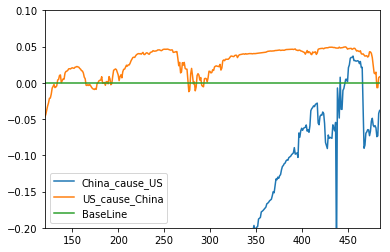

In [40]:
dicts = {"China_cause_US":[Open[['USA','CN']],4],"US_cause_China":[Open[['CN','USA']],4]}
#['NVDA','ZTE']

#_ =solution(dicts,120,Open)
_ =solution(dicts,120,Open)

In [41]:
ZTE = pd.read_csv("0763.HK.csv")
NVDA = pd.read_csv("NVDA.csv")
QCOM = pd.read_csv("QCOM.csv")

In [42]:
ZTE['Date'] = ZTE['Date'].apply(lambda x:datefilter(x) )
NVDA['Date'] = NVDA['Date'].apply(lambda x:datefilter(x) )
QCOM['Date'] = QCOM['Date'].apply(lambda x:datefilter(x) )

In [52]:
Close = pd.DataFrame()
Close['ZTE'] = ZTE['Close']
Close['NVDA'] = NVDA['Close']
Close['QCOM'] = QCOM['Close']
Close = Close/Close.iloc[0]

In [53]:
Close['Date'] = ZTE['Date']


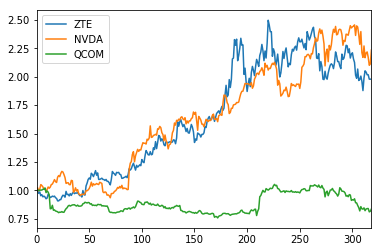

In [54]:

Close.plot()

In [55]:
granger(Close[['NVDA','ZTE']],maxlag = 3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=10.5653 , p=0.0013  , df_denom=315, df_num=1
ssr based chi2 test:   chi2=10.6659 , p=0.0011  , df=1
likelihood ratio test: chi2=10.4909 , p=0.0012  , df=1
parameter F test:         F=10.5653 , p=0.0013  , df_denom=315, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=5.3586  , p=0.0052  , df_denom=312, df_num=2
ssr based chi2 test:   chi2=10.8890 , p=0.0043  , df=2
likelihood ratio test: chi2=10.7061 , p=0.0047  , df=2
parameter F test:         F=5.3586  , p=0.0052  , df_denom=312, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=3.5789  , p=0.0143  , df_denom=309, df_num=3
ssr based chi2 test:   chi2=10.9801 , p=0.0118  , df=3
likelihood ratio test: chi2=10.7936 , p=0.0129  , df=3
parameter F test:         F=3.5789  , p=0.0143  , df_denom=309, df_num=3


{1: ({'lrtest': (10.490916329621541, 0.001199628614939688, 1),
   'params_ftest': (10.565262814392083, 0.0012769795553254988, 315.0, 1),
   'ssr_chi2test': (10.665884365005901, 0.001091296627158931, 1),
   'ssr_ftest': (10.565262814392637, 0.0012769795553251796, 315.0, 1)},
   array([[0., 1., 0.]])]),
 2: ({'lrtest': (10.706125586279768, 0.0047336306428784605, 2),
   'params_ftest': (5.358609153352148, 0.005150664074803824, 312.0, 2),
   'ssr_chi2test': (10.88896860008111, 0.004320067291805722, 2),
   'ssr_ftest': (5.3586091533522175, 0.00515066407480351, 312.0, 2)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'lrtest': (10.793615835414585, 0.012895859789113867, 3),
   'params_ftest': (3.5789473676563515, 0.014283478193029352, 309.0, 3),
   'ssr_chi2test': (10.980071535722443, 0.011834125841654336, 3),
   'ssr_ftest': (3.5789473676563657, 0.014283478193029255, 309.0, 3)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
     

In [56]:
granger(Close[['ZTE','NVDA']],maxlag = 3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.7841  , p=0.3766  , df_denom=315, df_num=1
ssr based chi2 test:   chi2=0.7916  , p=0.3736  , df=1
likelihood ratio test: chi2=0.7906  , p=0.3739  , df=1
parameter F test:         F=0.7841  , p=0.3766  , df_denom=315, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.2046  , p=0.8151  , df_denom=312, df_num=2
ssr based chi2 test:   chi2=0.4157  , p=0.8123  , df=2
likelihood ratio test: chi2=0.4154  , p=0.8125  , df=2
parameter F test:         F=0.2046  , p=0.8151  , df_denom=312, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.1565  , p=0.9255  , df_denom=309, df_num=3
ssr based chi2 test:   chi2=0.4800  , p=0.9233  , df=3
likelihood ratio test: chi2=0.4797  , p=0.9233  , df=3
parameter F test:         F=0.1565  , p=0.9255  , df_denom=309, df_num=3


{1: ({'lrtest': (0.7906065169900103, 0.3739167910855796, 1),
   'params_ftest': (0.7841222972082602, 0.3765588142142834, 315.0, 1),
   'ssr_chi2test': (0.7915901286100068, 0.3736197382496309, 1),
   'ssr_ftest': (0.7841222972080256, 0.376558814214369, 315.0, 1)},
   array([[0., 1., 0.]])]),
 2: ({'lrtest': (0.4153901519862302, 0.8124547358987885, 2),
   'params_ftest': (0.20455312021203487, 0.8151206593457803, 312.0, 2),
   'ssr_chi2test': (0.41566243017429644, 0.8123441365757169, 2),
   'ssr_ftest': (0.2045531202119566, 0.8151206593458369, 312.0, 2)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'lrtest': (0.47966939238358464, 0.9233347090729963, 3),
   'params_ftest': (0.15646665840272286, 0.9254739639522008, 309.0, 3),
   'ssr_chi2test': (0.4800336316044169, 0.9232555224592797, 3),
   'ssr_ftest': (0.1564666584027055, 0.9254739639522157, 309.0, 3)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0.,

In [57]:
granger(Close[['ZTE','QCOM']],maxlag = 3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.6304  , p=0.4278  , df_denom=315, df_num=1
ssr based chi2 test:   chi2=0.6364  , p=0.4250  , df=1
likelihood ratio test: chi2=0.6357  , p=0.4253  , df=1
parameter F test:         F=0.6304  , p=0.4278  , df_denom=315, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.8036  , p=0.4486  , df_denom=312, df_num=2
ssr based chi2 test:   chi2=1.6330  , p=0.4420  , df=2
likelihood ratio test: chi2=1.6288  , p=0.4429  , df=2
parameter F test:         F=0.8036  , p=0.4486  , df_denom=312, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.3893  , p=0.2460  , df_denom=309, df_num=3
ssr based chi2 test:   chi2=4.2624  , p=0.2345  , df=3
likelihood ratio test: chi2=4.2339  , p=0.2373  , df=3
parameter F test:         F=1.3893  , p=0.2460  , df_denom=309, df_num=3


{1: ({'lrtest': (0.6357497859178238, 0.4252540649316109, 1),
   'params_ftest': (0.6303820705325587, 0.4278129068409602, 315.0, 1),
   'ssr_chi2test': (0.636385709299438, 0.4250226225783401, 1),
   'ssr_ftest': (0.6303820705324622, 0.4278129068409988, 315.0, 1)},
   array([[0., 1., 0.]])]),
 2: ({'lrtest': (1.6287893482792697, 0.44290734950520105, 2),
   'params_ftest': (0.8036120987270938, 0.44863334326352555, 312.0, 2),
   'ssr_chi2test': (1.6329809954904193, 0.4419800658779056, 2),
   'ssr_ftest': (0.8036120987271463, 0.44863334326349436, 312.0, 2)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'lrtest': (4.2339420613557195, 0.23728553559086218, 3),
   'params_ftest': (1.3893375052168355, 0.24603890677023504, 309.0, 3),
   'ssr_chi2test': (4.2624335111506735, 0.23448496869500815, 3),
   'ssr_ftest': (1.3893375052168333, 0.24603890677023504, 309.0, 3)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 

In [58]:
granger(Close[['QCOM','ZTE']],maxlag = 3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.2726  , p=0.0395  , df_denom=315, df_num=1
ssr based chi2 test:   chi2=4.3133  , p=0.0378  , df=1
likelihood ratio test: chi2=4.2843  , p=0.0385  , df=1
parameter F test:         F=4.2726  , p=0.0395  , df_denom=315, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.2144  , p=0.1109  , df_denom=312, df_num=2
ssr based chi2 test:   chi2=4.4999  , p=0.1054  , df=2
likelihood ratio test: chi2=4.4682  , p=0.1071  , df=2
parameter F test:         F=2.2144  , p=0.1109  , df_denom=312, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.5225  , p=0.2086  , df_denom=309, df_num=3
ssr based chi2 test:   chi2=4.6709  , p=0.1975  , df=3
likelihood ratio test: chi2=4.6367  , p=0.2004  , df=3
parameter F test:         F=1.5225  , p=0.2086  , df_denom=309, df_num=3


{1: ({'lrtest': (4.284316900182603, 0.03846553632920776, 1),
   'params_ftest': (4.272616013754952, 0.03954791175239989, 315.0, 1),
   'ssr_chi2test': (4.313307594838589, 0.03781536858719817, 1),
   'ssr_ftest': (4.272616013755207, 0.03954791175239375, 315.0, 1)},
   array([[0., 1., 0.]])]),
 2: ({'lrtest': (4.468214610093128, 0.1070876838314232, 2),
   'params_ftest': (2.214438962771369, 0.11092854546801291, 312.0, 2),
   'ssr_chi2test': (4.499853533323423, 0.10540694358157338, 2),
   'ssr_ftest': (2.214438962771148, 0.11092854546803631, 312.0, 2)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'lrtest': (4.636697587419803, 0.20041648876094467, 3),
   'params_ftest': (1.522471008298721, 0.20863555409651252, 309.0, 3),
   'ssr_chi2test': (4.670881928377255, 0.19754514082312077, 3),
   'ssr_ftest': (1.5224710083001811, 0.20863555409613288, 309.0, 3)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0., 0.

Start: 2017-07-31 00:00:00
End: 2018-04-18 00:00:00


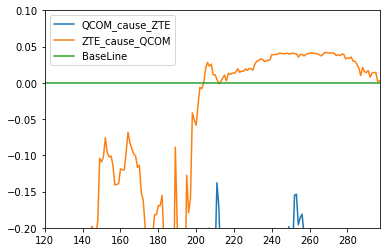

In [59]:
dicts1 = {"ZTE_cause_NVDA":[Close[['NVDA','ZTE']],3],"NVDA_cause_ZTE":[Close[['ZTE','NVDA']],3]}
dicts2 = {"ZTE_cause_QCOM":[Close[['QCOM','ZTE']],1],"QCOM_cause_ZTE":[Close[['ZTE','QCOM']],1]}
_ =solution(dicts2,120,Close)